CAR PRICE PREDICTION MODEL PROJECT DOCUMENTATION

GROUP NUMBER: 8

ACTIVE  GROUP MEMBERS 

NAME    EMAIL ADDRESS

Umar Muhammed Abubakar	Aniekanetimudo@gmail.com

Aniekan Etim Udo	Aniekanetimudo@gmail.com

Ajevwarue Theophilus 	theolove1996@gmail.com


In [1]:
# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
# Creating a DataFrame of the data set
cars = pd.read_csv("Car_Price_Prediction.csv")

# Displaying the first five rows
cars.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [3]:
# Checking basic information of dataset
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


The result above shows that there are 8128 rows and 13 columns in the DataFrame. There are missing values in mileage, engine, max_power, torque and seats columns. The datatype of mileage, max_power, engine and torque is object rather than float.

# Data cleaning and feature engineering

In [4]:
# Making a copy of the original file
data = cars.copy()

# Displaying first five items of copied data
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [5]:
# Checking for duplicates
data.duplicated().sum()

1202

The data contains 1202 duplicates.

In [6]:
# Dealing with duplicate values
print("Shape before duplicates removal:", data.shape)

# Removing duplicate values
data.drop_duplicates(inplace = True)

print("Shape after duplicates removal:", data.shape)

Shape before duplicates removal: (8128, 13)
Shape after duplicates removal: (6926, 13)


Data shape has reduced from 8128 rows to 6926 after duplicates were removed.

In [7]:
# Checking the first six unique values of mileage, engine, max_power and torque columns
for col in data.columns:
    if col in ["mileage", "engine", "max_power", "torque"]:
        print(f"Unique values of {col}")
        print(data[col].unique()[:6])
        print("=================================================\n")

Unique values of mileage
['23.4 kmpl' '21.14 kmpl' '17.7 kmpl' '23.0 kmpl' '16.1 kmpl' '20.14 kmpl']

Unique values of engine
['1248 CC' '1498 CC' '1497 CC' '1396 CC' '1298 CC' '1197 CC']

Unique values of max_power
['74 bhp' '103.52 bhp' '78 bhp' '90 bhp' '88.2 bhp' '81.86 bhp']

Unique values of torque
['190Nm@ 2000rpm' '250Nm@ 1500-2500rpm' '12.7@ 2,700(kgm@ rpm)'
 '22.4 kgm at 1750-2750rpm' '11.5@ 4,500(kgm@ rpm)' '113.75nm@ 4000rpm']



From the result, we can see that their respective units is the reason why the datatype are "object" rather than "float".  

In [10]:
# Importing regular expression or regex
import re

# Defining the function
def convert_to_float(values_units):
    try:
        # Convert all values to str
        values_units = str(values_units)

        # Using regular expression to find numbers with optional decimal points
        match = re.search(r"[-+]?[0-9]*\.?[0-9]+", values_units)
        if match:
            return float(match.group())
        else:
            # if no number is found, let's return nan
            return float("nan")
    except ValueError:
        # if ValuesError is raised, return nan
        return float("nan")

In [11]:
# Applying the function to the mileage, engine and max_power columns
data["mileage"] = data["mileage"].apply(convert_to_float).astype(float)
data["engine"] = data["engine"].apply(convert_to_float).astype(float)
data["max_power"] = data["max_power"].apply(convert_to_float).astype(float)

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6926 entries, 0 to 8125
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6926 non-null   object 
 1   year           6926 non-null   int64  
 2   selling_price  6926 non-null   int64  
 3   km_driven      6926 non-null   int64  
 4   fuel           6926 non-null   object 
 5   seller_type    6926 non-null   object 
 6   transmission   6926 non-null   object 
 7   owner          6926 non-null   object 
 8   mileage        6718 non-null   float64
 9   engine         6718 non-null   float64
 10  max_power      6720 non-null   float64
 11  torque         6717 non-null   object 
 12  seats          6718 non-null   float64
dtypes: float64(4), int64(3), object(6)
memory usage: 757.5+ KB


The mileage, engine and max_power columns have been successfully changed into float

In [12]:
# Checking the first ten items of the torque column
data.torque.head(10)

0              190Nm@ 2000rpm
1         250Nm@ 1500-2500rpm
2       12.7@ 2,700(kgm@ rpm)
3    22.4 kgm at 1750-2750rpm
4       11.5@ 4,500(kgm@ rpm)
5           113.75nm@ 4000rpm
6        7.8@ 4,500(kgm@ rpm)
7               59Nm@ 2500rpm
8         170Nm@ 1800-2400rpm
9              160Nm@ 2000rpm
Name: torque, dtype: object

In [13]:
# Defining conversion factor from kgm to Nm
kgm_to_nm_factor = 9.80665

# Function to extract and convert torque and rpm values
def extract_torque_rpm(torque_str):
    if pd.isna(torque_str):
        return np.nan, np.nan
    # Extract numbers
    numbers = re.findall(r'[\d\.,]+', torque_str)
    # Remove commas and convert to float
    numbers = [float(num.replace(',', '')) for num in numbers]
    # Check for 'kgm' and convert the first number
    if 'kgm' in torque_str.lower():
        numbers[0] *= kgm_to_nm_factor
    # Calculate average RPM if range is provided
    rpm = (numbers[-2] + numbers[-1]) / 2 if 'at' in torque_str.lower() or '-' in torque_str else numbers[-1]
    return numbers[0], rpm

# Apply the function to the 'torque' column
data[['torque_value', 'rpm_value']] = data.apply(lambda row: extract_torque_rpm(row['torque']), axis=1, result_type='expand')

In [12]:
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,torque_value,rpm_value
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,190Nm@ 2000rpm,5.0,190.000000,2000.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,250Nm@ 1500-2500rpm,5.0,250.000000,2000.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,"12.7@ 2,700(kgm@ rpm)",5.0,124.544455,2700.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,22.4 kgm at 1750-2750rpm,5.0,219.668960,2250.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,"11.5@ 4,500(kgm@ rpm)",5.0,112.776475,4500.0


In [14]:
# dropping the torque column
data.drop("torque", axis = 1, inplace = True)

data.head(2)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,torque_value,rpm_value
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,190.0,2000.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,250.0,2000.0


The torque and rpm values have been successfully separated and kgm converted to Nm.

In [15]:
# Checking for missing or null values
data.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          208
engine           208
max_power        206
seats            208
torque_value     209
rpm_value        209
dtype: int64

From the results shown: mileage, engine and seats has 208 missing values, max_power has 206 missing values, while torque_value and rpm_value both have 209 missing values.

In [16]:
# Exploring the missing values
missing_values = data[data.isnull().any(axis = 1)]

missing_values.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,torque_value,rpm_value
13,Maruti Swift 1.3 VXi,2007,200000,80000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN,NaN
31,Fiat Palio 1.2 ELX,2003,70000,50000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN,NaN
78,Tata Indica DLS,2003,50000,70000,Diesel,Individual,Manual,First Owner,NaN,NaN,NaN,NaN,NaN,NaN
87,Maruti Swift VDI BSIV W ABS,2015,475000,78000,Diesel,Dealer,Manual,First Owner,NaN,NaN,NaN,NaN,NaN,NaN
119,Maruti Swift VDI BSIV,2010,300000,120000,Diesel,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
# Data rows without nulls
no_nulls = data[data.notnull()]

no_nulls.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,torque_value,rpm_value
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,190.000000,2000.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,250.000000,2000.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0,124.544455,2700.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0,219.668960,2250.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0,112.776475,4500.0


In [18]:
# Exploring the none nulls data
no_nulls.name.unique()[:10] # Returns unqiue car models in the data set

array(['Maruti Swift Dzire VDI', 'Skoda Rapid 1.5 TDI Ambition',
       'Honda City 2017-2020 EXi', 'Hyundai i20 Sportz Diesel',
       'Maruti Swift VXI BSIII', 'Hyundai Xcent 1.2 VTVT E Plus',
       'Maruti Wagon R LXI DUO BSIII', 'Maruti 800 DX BSII',
       'Toyota Etios VXD', 'Ford Figo Diesel Celebration Edition'],
      dtype=object)

In [19]:
# Checking information of two car models
check = no_nulls[(no_nulls["name"] =="Maruti Swift Dzire VDI") | (no_nulls["name"] == "Toyota Fortuner 4x4 MT")]

check.head(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,torque_value,rpm_value
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,190.0,2000.0
47,Toyota Fortuner 4x4 MT,2014,1500000,77000,Diesel,Dealer,Manual,First Owner,12.55,2982.0,168.50,7.0,343.0,2400.0
75,Toyota Fortuner 4x4 MT,2015,1700000,78000,Diesel,Individual,Manual,Second Owner,12.55,2982.0,168.50,7.0,343.0,2400.0
214,Maruti Swift Dzire VDI,2018,700000,50000,Diesel,Individual,Manual,First Owner,28.40,1248.0,74.02,5.0,190.0,2000.0
245,Maruti Swift Dzire VDI,2013,550000,70000,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,190.0,2000.0
248,Maruti Swift Dzire VDI,2014,500000,120000,Diesel,Individual,Manual,Second Owner,23.40,1248.0,74.00,5.0,190.0,2000.0
260,Maruti Swift Dzire VDI,2012,360000,158000,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,190.0,2000.0
303,Maruti Swift Dzire VDI,2017,650000,25000,Diesel,Individual,Manual,First Owner,26.59,1248.0,74.00,5.0,190.0,2000.0
366,Maruti Swift Dzire VDI,2016,550000,60000,Diesel,Individual,Manual,Second Owner,26.59,1248.0,74.00,5.0,190.0,2000.0
392,Maruti Swift Dzire VDI,2015,480000,90000,Diesel,Individual,Manual,First Owner,26.59,1248.0,74.00,5.0,190.0,2000.0


From the above we could see a pattern. Cars of same model name and year has same mileage, engine, max_power, torque and seats specifications.

In [20]:
# Checking if there's any data both in missing_value and no_nulls with same model name and year
missing_values[["name", "year"]].isin(no_nulls[["name", "year"]]).any()

name    True
year    True
dtype: bool

The results above shows that there are car models of same model names and year present in both missing_values and no_nulls DataFrames.

In [21]:
data[(data["name"] == "Maruti Swift VDI BSIV") & (data["year"] == 2017)].head(2)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,torque_value,rpm_value
484,Maruti Swift VDI BSIV,2017,585000,90000,Diesel,Individual,Manual,First Owner,25.2,1248.0,74.0,5.0,190.0,2000.0
3173,Maruti Swift VDI BSIV,2017,525000,38000,Diesel,Dealer,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN,NaN


This shows that there are values with same name and year in both the missing_values and no_nulls DataFrame.


We'll fill missing values using the first complete row as reference

In [22]:
# Creating a list of the columns to fill
columns_to_fill = ['mileage', 'engine', 'max_power', 'torque_value', "rpm_value",
       'seats']

In [23]:
# Function to fill missing values using the first complete row as reference
def filled_with_reference(group):
    # Find the first row with all columns complete
    reference_row = group.dropna(subset = columns_to_fill)

    if not reference_row.empty:
        # Fill missing values only for specified columns
        for col in columns_to_fill:
            if group[col].isnull().any():
                group[col] = group[col].fillna(reference_row.iloc[0][col])
    return group

# Group by name, year and apply the filling function and reset index
data = data.groupby(["name", "year"], sort = False).apply(filled_with_reference).reset_index(drop = True)

In [24]:
# Checking
data[(data["name"] == "Maruti Swift VDI BSIV") & (data["year"] == 2017)].head(2)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,torque_value,rpm_value
1258,Maruti Swift VDI BSIV,2017,585000,90000,Diesel,Individual,Manual,First Owner,25.2,1248.0,74.0,5.0,190.0,2000.0
1259,Maruti Swift VDI BSIV,2017,525000,38000,Diesel,Dealer,Manual,Second Owner,25.2,1248.0,74.0,5.0,190.0,2000.0


The result above showed that missing values have been filled where there was a complete row with same name and year

In [25]:
# Checking missing values left
data.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          199
engine           199
max_power        200
seats            199
torque_value     200
rpm_value        200
dtype: int64

The missing values have reduced for each column.

In [26]:
# Checking name column
data.name

0                             Maruti Swift Dzire VDI
1                             Maruti Swift Dzire VDI
2                             Maruti Swift Dzire VDI
3                             Maruti Swift Dzire VDI
4                             Maruti Swift Dzire VDI
                            ...                     
6921    Toyota Innova 2.5 GX (Diesel) 8 Seater BS IV
6922                     Maruti Wagon R LXI Optional
6923               Maruti Wagon R VXI BS IV with ABS
6924                      Hyundai i20 Magna 1.4 CRDi
6925                          Maruti Swift Dzire ZDi
Name: name, Length: 6926, dtype: object

The name column has a pattern, the first name describing the brand, while the others is the model. From this we'll extract a new column called brand_name representing the brand of the cars

In [27]:
data["brand_name"] = data["name"].apply(lambda x: x.split()[0])

data.head(2)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,torque_value,rpm_value,brand_name
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4,1248.0,74.0,5.0,190.0,2000.0,Maruti
1,Maruti Swift Dzire VDI,2014,500000,120000,Diesel,Individual,Manual,Second Owner,23.4,1248.0,74.0,5.0,190.0,2000.0,Maruti


We'll fill missing values in each column with the average of that column with same brand name.

In [28]:
for column in ['mileage', 'engine', 'max_power', 'seats', 'torque_value', 'rpm_value']:
    # Grouping the data by 'brand_name', calculating the mean, then filling in missing values
    data[column] = data.groupby('brand_name')[column].transform(lambda x: x.fillna(x.mean()))

In [29]:
# Checking missing value left
data.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          1
engine           1
max_power        1
seats            1
torque_value     1
rpm_value        1
brand_name       0
dtype: int64

In [30]:
# Checking the missing value
data[data.isnull().any(axis = 1)]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,torque_value,rpm_value,brand_name
6468,Peugeot 309 GLD,1997,57000,110000,Diesel,Individual,Manual,Third Owner,NaN,NaN,NaN,NaN,NaN,NaN,Peugeot


In [31]:
# Checking the number of occurrence of the brand
data["brand_name"][data["brand_name"] ==  "Peugeot"].count()

1

Result above shows only one occurrence of the Peugeot brand. As such this value will removed.

In [32]:
# Removing the row of the Peugeot brand
data.dropna(inplace = True)

data.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
seats            0
torque_value     0
rpm_value        0
brand_name       0
dtype: int64

All missing values have been dealt with

In [33]:
# Dropping name column
data.drop("name", axis = 1, inplace = True)

data.sample(2)

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,torque_value,rpm_value,brand_name
5275,2010,229999,140000,Diesel,Individual,Manual,First Owner,18.40000,1248.000000,75.000000,5.000000,190.000000,1750.000000,Tata
4336,2002,210000,275000,Diesel,Individual,Manual,Fourth & Above Owner,14.90213,2253.614198,113.407006,6.682099,228.449059,2515.740741,Toyota


Torque value at a particular rpm helps us understand how well a car performs under load. This is known as engine power which describes the output of the engine at a particular time. The higher the value, the higher the ability of the car to accelerate faster under load.
We will use this understanding to create a new column called engine_power which combines the value of torque and rpm.
Since our max_power was in bhp (brake horse power), to maintain unit consistency, we'll calculate our engine_power in hp (hp).

In [34]:
# Defining a function to convert torque_value_(Nm) and rpm to engine_power(hp)
def eng_power(torque_value, rpm_value):
    return (torque_value * rpm_value) / 7127 # 7127 is the conversion factor for Nm and rpm to hp.


# Applying the function to each row in the DataFrame and creatin the new engine_power_hp column
data["engine_power"] = data.apply(lambda row: eng_power(row["torque_value"], row["rpm_value"]), axis = 1)

In [35]:
# Checking if successful
data.head(2)

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,torque_value,rpm_value,brand_name,engine_power
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4,1248.0,74.0,5.0,190.0,2000.0,Maruti,53.318367
1,2014,500000,120000,Diesel,Individual,Manual,Second Owner,23.4,1248.0,74.0,5.0,190.0,2000.0,Maruti,53.318367


In [36]:
# Dropping torque_value and rpm_value columns
data.drop(["torque_value", "rpm_value"], axis = 1, inplace = True)

# Checking the ramdom two items
data.sample(2)

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,brand_name,engine_power
3887,2003,110000,83000,Petrol,Individual,Manual,Second Owner,13.80,1299.0,70.00,5.0,Ford,36.807617
1651,2015,285000,40000,Petrol,Individual,Manual,First Owner,23.95,998.0,67.05,5.0,Maruti,44.198120


The new column has been successfully created and data cleaned.

# Data Exploration and Visualization

Our columns have both categorical and continuous variables. We'll check for correlation between the selling price and the continuous values using a scatter plot and use bar charts for categorical values. Year column will be visualized using a line chart

In [37]:
data.columns

Index(['year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'seats',
       'brand_name', 'engine_power'],
      dtype='object')

> **Visualizing continuous variables**

km_driven, mileage, engine, max_power, seats and engine_power_hp

In [38]:
# Defining scatterplot fucntion
def plot_scatter(df, feature_name, label = "selling_price"):
    sns.scatterplot(x = df[feature_name], y = df[label], data = df)
    plt.yscale("log")
    plt.yticks([10000, 100000, 1000000, 10000000], ["10 Th", "100 Th", "1 M", "10 M"])

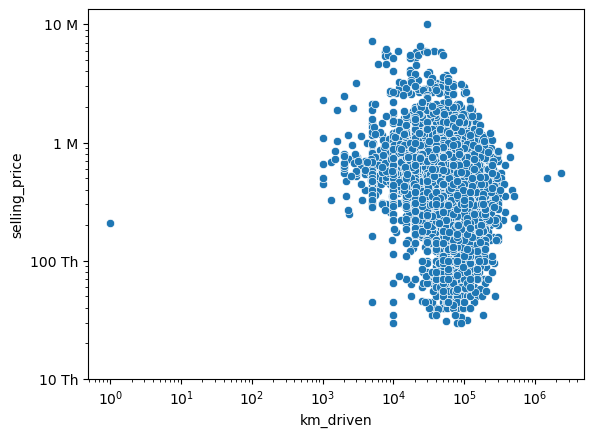

In [39]:
# Checking km_driven
plot_scatter(data, "km_driven")
plt.xscale("log")

The values are quite densed. Although not seemingly obvious, but there seems to a little pattern to suggest higher km_driven results in lower selling price.

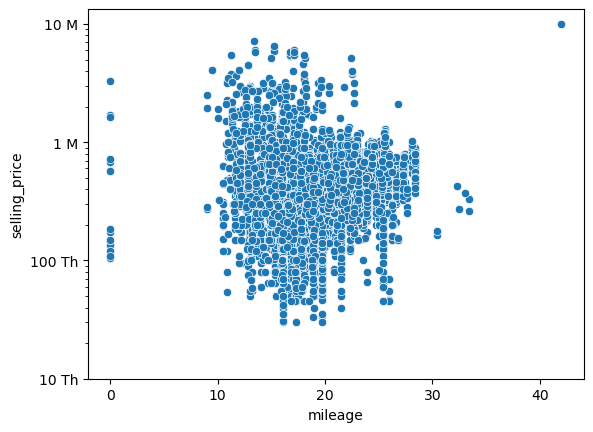

In [40]:
# Checking for mileage
plot_scatter(data, "mileage")

Like the km_driven, although not seemingly obvious but cars with higher mileage (fuel efficiency) have higher selling prices than those with lower mileage

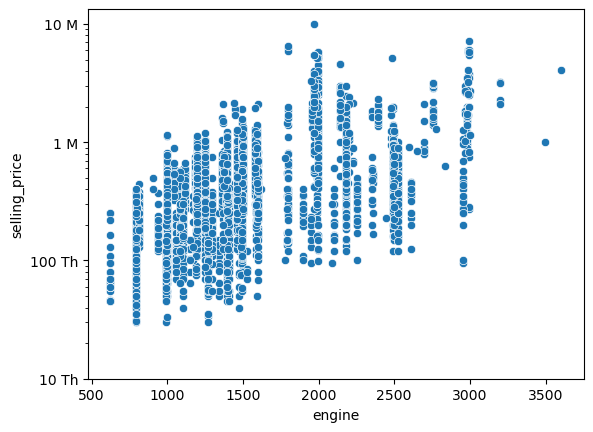

In [41]:
# Checking engine capacity
plot_scatter(data, "engine")

This is quite obvious that cars with higher engine capacity have higher selling price than those with lower engine capacity.

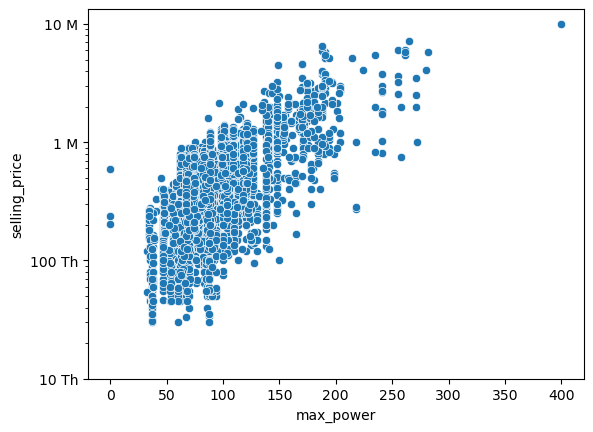

In [42]:
# Checking max_power
plot_scatter(data, "max_power")

The chart shows that cars with higher max power has higher selling price. 

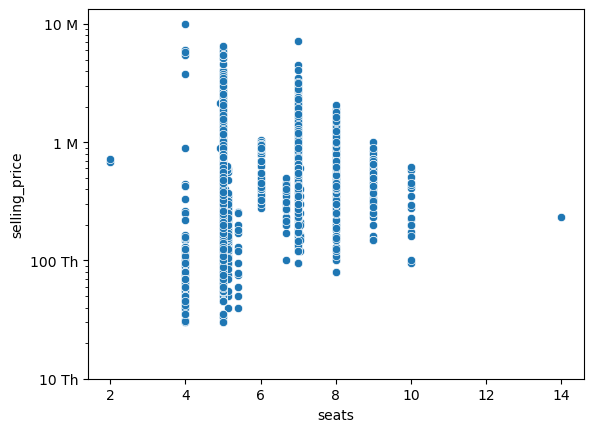

In [43]:
# Checking for seats
plot_scatter(data, "seats")

There's no much pattern to suggest whether the number of seats affects the affects the selling price

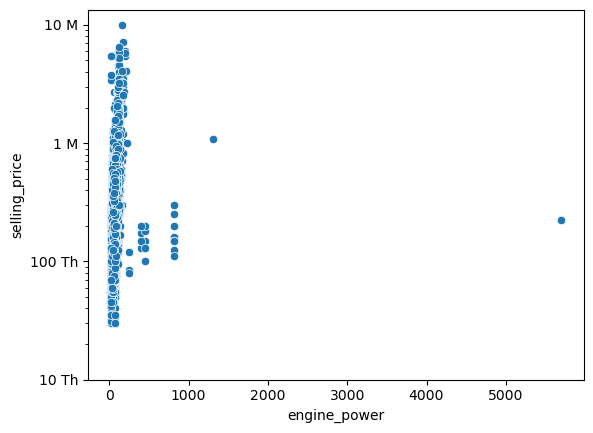

In [44]:
# Checking for engine_power_hp
plot_scatter(data, "engine_power")

There's probably an outlier in the dataset. This affected the distribution of the engine power value.  

**Dealing with the outliers**

In [45]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
year,6925.0,2013.422671,4.073804,1983.000000,2011.000000,2014.000000,2017.000000,2.020000e+03
selling_price,6925.0,517337.143538,519775.082642,29999.000000,250000.000000,400000.000000,634000.000000,1.000000e+07
km_driven,6925.0,73990.477256,58360.705013,1.000000,40000.000000,70000.000000,100000.000000,2.360457e+06
mileage,6925.0,19.463285,4.013876,0.000000,16.800000,19.620000,22.320000,4.200000e+01
engine,6925.0,1431.771809,491.853349,624.000000,1197.000000,1248.000000,1498.000000,3.604000e+03
max_power,6925.0,87.717524,31.466143,0.000000,68.000000,81.860000,99.788604,4.000000e+02
seats,6925.0,5.436128,0.977396,2.000000,5.000000,5.000000,5.000000,1.400000e+01
engine_power,6925.0,64.291822,79.805798,11.786165,47.144661,55.984285,70.616232,5.699333e+03


In reality a car power of over 5000hp is unlikely, while that of 11hp were only present in earliest cars. The value over 5000 hp is likely an outlier and will be removed from the dataset. And max_power and mileage (fuel efficiency) of 0.0 is also unlikely. Thus that row will be removed as well.

In [49]:
# Finding their max and min values
max_engine_power = data.engine_power.max()
min_max_power = data.max_power.min()
min_mileage = data.mileage.min()

# Finding their index
max_index = data[data["engine_power"]== max_engine_power].index
min_index = data[data["max_power"] == min_max_power].index
min_mil_index = data[data["mileage"] == min_mileage].index

# Dropping values
data.drop(max_index, inplace = True)
data.drop(min_index, inplace = True)
data.drop(min_mil_index, inplace = True)

In [50]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
year,6846.0,2013.439381,4.070639,1983.000000,2011.000000,2014.000000,2017.000000,2.020000e+03
selling_price,6846.0,518352.866199,517005.009306,29999.000000,250000.000000,409999.000000,638750.000000,1.000000e+07
km_driven,6846.0,74072.299591,58536.527443,1.000000,40000.000000,70000.000000,100000.000000,2.360457e+06
mileage,6846.0,19.531689,3.897823,10.100000,16.950000,19.670000,22.320000,4.200000e+01
engine,6846.0,1433.939640,488.843746,624.000000,1197.000000,1248.000000,1498.000000,3.498000e+03
max_power,6846.0,87.923423,31.009925,35.500000,68.000000,81.860000,99.788604,4.000000e+02
seats,6846.0,5.433273,0.968800,4.000000,5.000000,5.000000,5.000000,1.400000e+01
engine_power,6846.0,62.314584,26.477382,16.100744,47.182549,56.124597,70.616232,4.471953e+02


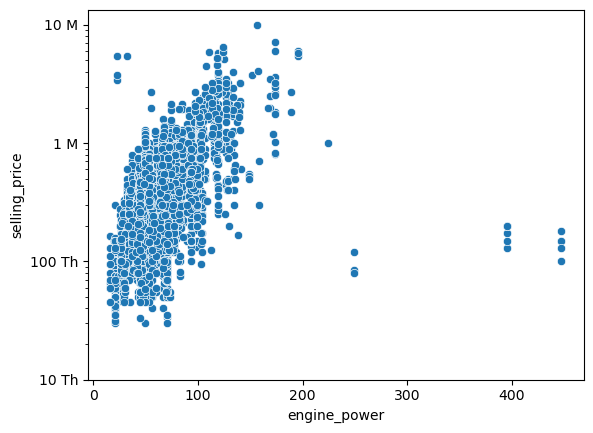

In [51]:
# Rechecking engine_power columns
plot_scatter(data, "engine_power")

The distribution is being skewed by the the highest engine_power value present. To understand the distribution better, we'll take take the log of the column and that of the selling pricing before checking the distribution.  

In [52]:
# Creating a new dataframe containing just selling price and engine power
scatter_check = data[["selling_price", "engine_power"]]

scatter_check.head()

,selling_price,engine_power
0,450000,53.318367
1,500000,53.318367
2,420000,53.318367
3,450000,53.318367
4,509999,53.318367


In [53]:
# Taking the log of their values
make_log = np.log(scatter_check)

make_log.head()

,selling_price,engine_power
0,13.017003,3.976281
1,13.122363,3.976281
2,12.948010,3.976281
3,13.017003,3.976281
4,13.142164,3.976281


<Axes: xlabel='engine_power', ylabel='selling_price'>

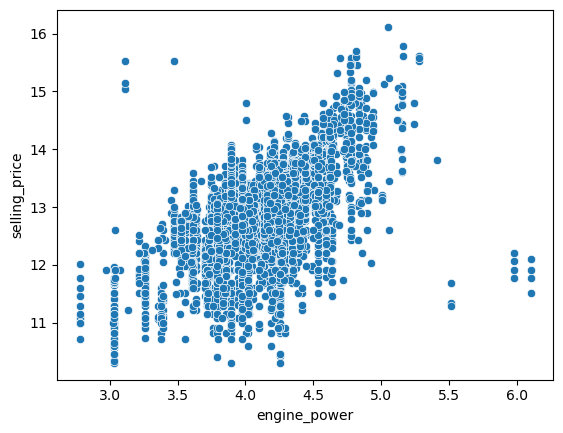

In [54]:
# Checking the distribution in a scatterplot
sns.scatterplot(x = "engine_power", y = "selling_price", data = make_log)

The result above shows that the higher the engine_power, the higher the selling price of the car.

> **Visualizing categorical variables**

brand_name, fuel, seller_typer, transmission, owner

In [51]:
data.columns

Index(['year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'seats',
       'brand_name', 'engine_power'],
      dtype='object')

In [52]:
# defining the bar chart function
def plot_bar(df, feature_name, label = "selling_price"):
    sns.barplot(x = df[feature_name], y = label, data = df)
    plt.xticks(rotation = 90)
    plt.yscale("log")
    plt.yticks([10000, 100000, 1000000, 10000000], ["10 Th", "100 Th", "1 M", "10 M"])

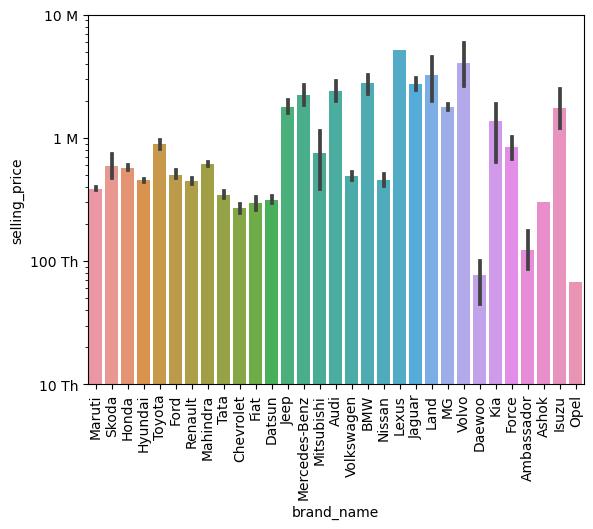

In [53]:
# For brand_name
plot_bar(data, "brand_name")

Lexus and volvo has the highest selling prices with Opel and Daewoo with the lowest selling price.  

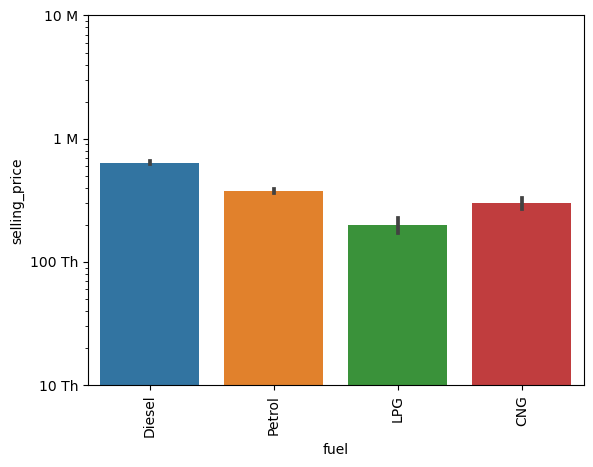

In [54]:
# Checking for fuel
plot_bar(data, "fuel")

Diesel cars have the highest selling price while LPG cars have the least selling price

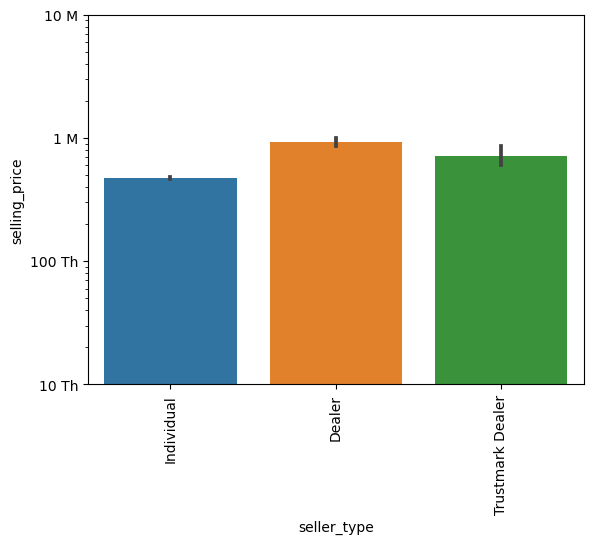

In [55]:
# Checking for seller_type
plot_bar(data, "seller_type")

Cars sold by deals have higher than prices while those sold by individuals have the least prices.

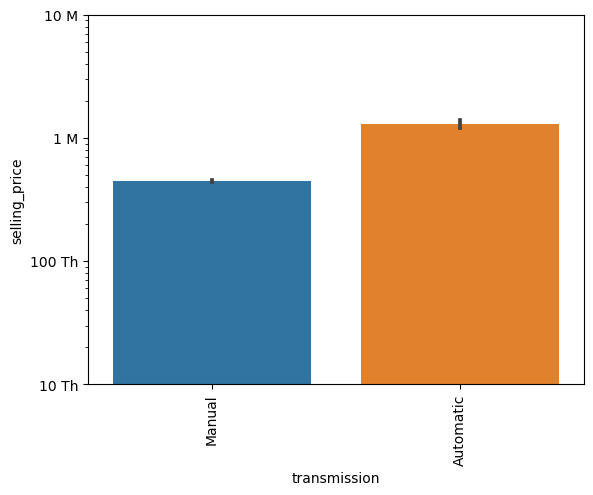

In [56]:
# Checking for transmission
plot_bar(data, "transmission")

Cars that uses automatic transmission are more expensive than cars with manual transmission.

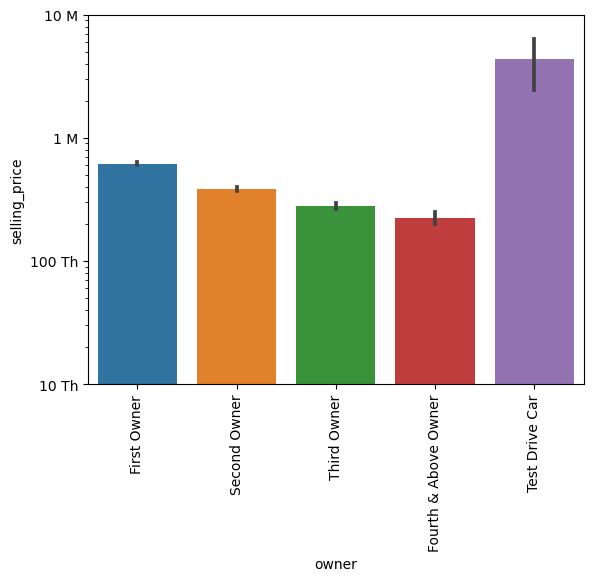

In [57]:
# Checking for owner
plot_bar(data, "owner")

Test drive cars and cars with first owner are more expensive with cars with fourth & above owner being the least expensive.

([<matplotlib.axis.YTick at 0x1a33efc7e20>,
 [Text(0, 10000, '10 Th'),
  Text(0, 100000, '100 Th'),
  Text(0, 1000000, '1 M'),
  Text(0, 10000000, '10 M')])

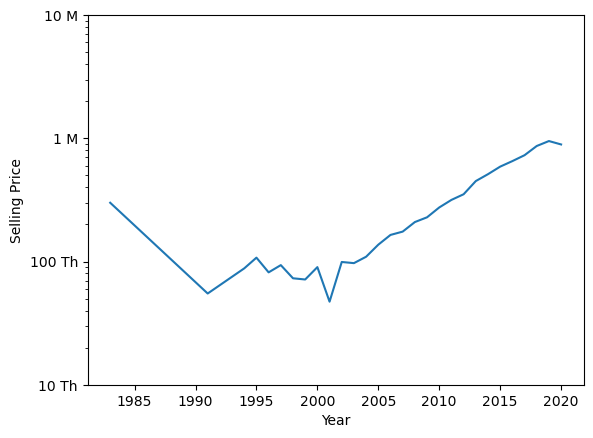

In [67]:
# Checking for the year. We'll use a line chart
year_sell = data.groupby(("year"))["selling_price"].mean().reset_index()

# Plotting the chart
plt.plot("year", "selling_price", data = year_sell)
plt.xlabel("Year")
plt.ylabel("Selling Price")
plt.yscale("log")
plt.yticks([10000, 100000, 1000000, 10000000], ["10 Th", "100 Th", "1 M", "10 M"])

The line chart shows that the lastest the car the higher it price will be.

# Data Preprocessing

In [68]:
data.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,brand_name,engine_power
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4,1248.0,74.0,5.0,Maruti,53.318367
1,2014,500000,120000,Diesel,Individual,Manual,Second Owner,23.4,1248.0,74.0,5.0,Maruti,53.318367
2,2014,420000,80000,Diesel,Individual,Manual,First Owner,23.4,1248.0,74.0,5.0,Maruti,53.318367
3,2014,450000,80000,Diesel,Individual,Manual,First Owner,23.4,1248.0,74.0,5.0,Maruti,53.318367
4,2014,509999,110000,Diesel,Individual,Manual,First Owner,23.4,1248.0,74.0,5.0,Maruti,53.318367


Our data has five categorical data, all which are norminal. As such we'll one_hot encode using pd.get_dummies but we'll use binary encoding for brand_name

> **Encoding the data**

In [70]:
len(data.brand_name.unique())

31

Our original data already has 13 columns, one encoding the categorical data will increase the total numbers of our columns in our dataset.

And if we were to label encoder, we'll be introducing order which might affect the performance of linear models. To solve this we'll use binary encoding which uses small number of binary bits to encode the column.

For example our brand_name column with 31 unique values will require 2^5 = 32 bits. In this case 5 columns will be used to encode the column.

In [71]:
# making a copy of the dataset
df = data.copy()

df.sample(2)

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,brand_name,engine_power
5346,2006,350000,90000,Diesel,Individual,Manual,First Owner,12.70,2609.0,116.6,8.0,Mahindra,75.933770
3422,2012,259000,35000,Diesel,Individual,Manual,First Owner,23.03,1396.0,69.0,5.0,Tata,47.144661


In [72]:
df.shape

(6906, 13)

In [73]:
# creating a dummy variable for fuel, seller_type, transmission and owner columns
dummies = pd.get_dummies(df[["fuel", "seller_type", "transmission", "owner"]], drop_first = True).astype(int)

# Merging the dummy columns to the original dataframe
df = pd.concat([df, dummies], axis = 1)

# Dropping fuel, seller_type, transmission and owner columns
df.drop(["fuel", "seller_type", "transmission", "owner"], axis = 1, inplace = True)

# Displaying two random samples
df.sample(2)

,year,selling_price,km_driven,mileage,engine,max_power,seats,brand_name,engine_power,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
832,2011,404000,122358,12.05,2179.0,120.0,9.0,Mahindra,93.587765,1,0,0,1,0,1,0,0,0,0
1377,2012,280000,80000,20.54,1598.0,103.6,5.0,Volkswagen,70.155746,1,0,0,1,0,1,0,0,0,1


In [74]:
# Employing binary encoding to brand_name column
from category_encoders import BinaryEncoder

# Initiating the encoder
encoder = BinaryEncoder(cols = ["brand_name"])

# Fitting and transforming the df
df = encoder.fit_transform(df)

# Displaying two random samples
df.sample(2)

,year,selling_price,km_driven,mileage,engine,max_power,seats,brand_name_0,brand_name_1,brand_name_2,...,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
2517,2016,750000,71000,18.49,1493.0,100.0,7.0,0,1,0,...,1,0,0,1,0,1,0,0,0,0
1844,2017,350000,25000,23.01,999.0,67.0,5.0,0,0,1,...,0,0,1,1,0,1,0,0,0,0


The 31 unique brand_names have been transformed to 5 columns.

In [75]:
df.shape

(6906, 23)

In [76]:
# Splitting data into features and label
x = df.drop("selling_price", axis = 1) # Featues

x.head(2)

,year,km_driven,mileage,engine,max_power,seats,brand_name_0,brand_name_1,brand_name_2,brand_name_3,...,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,2014,145500,23.4,1248.0,74.0,5.0,0,0,0,0,...,1,0,0,1,0,1,0,0,0,0
1,2014,120000,23.4,1248.0,74.0,5.0,0,0,0,0,...,1,0,0,1,0,1,0,1,0,0


In [77]:
y = df.selling_price # Label

y.head(2)

0    450000
1    500000
Name: selling_price, dtype: int64

In [78]:
# Scaling the dataset
from sklearn.preprocessing import StandardScaler, RobustScaler

# Creating an object of the scaler
std = StandardScaler()
robust = RobustScaler()

# Fit and transforming the features
x_std = pd.DataFrame(std.fit_transform(x), columns = x.columns)
x_robust = pd.DataFrame(robust.fit_transform(x), columns = x.columns)

# Displaying first two rows of the standardized data
x_std.head(2)

,year,km_driven,mileage,engine,max_power,seats,brand_name_0,brand_name_1,brand_name_2,brand_name_3,...,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,0.140872,1.224433,0.995387,-0.373484,-0.438075,-0.44844,-0.237247,-0.591063,-0.716342,-0.515747,...,0.918459,-0.074384,-0.893553,0.336649,-0.06265,0.30251,-0.157903,-0.631975,-0.026917,-0.289489
1,0.140872,0.787716,0.995387,-0.373484,-0.438075,-0.44844,-0.237247,-0.591063,-0.716342,-0.515747,...,0.918459,-0.074384,-0.893553,0.336649,-0.06265,0.30251,-0.157903,1.582342,-0.026917,-0.289489


In [79]:
x_robust.head(2)

,year,km_driven,mileage,engine,max_power,seats,brand_name_0,brand_name_1,brand_name_2,brand_name_3,...,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,0.0,1.258333,0.675725,0.0,-0.247258,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.833333,0.675725,0.0,-0.247258,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


# Model Training and Evaluation

**Using Train Test Split**

In [80]:
# Splitting the dataset into training and testing datasets for standard scaler
from sklearn.model_selection import train_test_split

x_std_train, x_std_test, y_std_train, y_std_test = train_test_split(x_std, y, test_size=0.2, shuffle= True, random_state= 42)

# Checking the shapes of the splitted dataset
print("Shape of x_std_train:", x_std_train.shape)
print("Shape of x_std_test:", x_std_test.shape)
print("Shape of y_std_train:", y_std_train.shape)
print("Shape of y_std_test:", y_std_test.shape)

Shape of x_std_train: (5524, 22)
Shape of x_std_test: (1382, 22)
Shape of y_std_train: (5524,)
Shape of y_std_test: (1382,)


In [83]:
# Splitting the dataset into training and testing datasets for robust scaler
from sklearn.model_selection import train_test_split

x_robust_train, x_robust_test, y_robust_train, y_robust_test = train_test_split(x_robust, y, test_size=0.2, shuffle= True, random_state= 42)

# Checking the shapes of the splitted dataset
print("Shape of x_robust_train:", x_robust_train.shape)
print("Shape of x_robust_test:", x_robust_test.shape)
print("Shape of y_robust_train:", y_robust_train.shape)
print("Shape of y_robust_test:", y_robust_test.shape)

Shape of x_robust_train: (5524, 22)
Shape of x_robust_test: (1382, 22)
Shape of y_robust_train: (5524,)
Shape of y_robust_test: (1382,)


In [89]:
# Importing models
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR

# Creating an object of the models
lr = LinearRegression()
lasso = Lasso(alpha = 1.0)
ridge = Ridge(alpha= 1.0)
dt = DecisionTreeRegressor()
rf = RandomForestRegressor()
gb = GradientBoostingRegressor()
cat = CatBoostRegressor(iterations=1000,  # Specify other hyperparameters as needed
                          learning_rate=0.1,
                          depth=6,
                          loss_function='RMSE',
                          verbose=False)
xgb = XGBRegressor()
svm = SVR()

In [90]:
models = [lr, lasso, ridge, dt, rf, gb, cat, xgb, svm]
scalers = ["StandardScaler", "RobustScaler"]
for model in models:
    for scaler in scalers:
        if scaler == "StandardScaler":
             # Training model
             model = model.fit(x_std_train, y_std_train)
             # Printing score
             print(f"{model} StandardScaler score on training set {model.score(x_std_train, y_std_train)}")
             print(f"{model} StandardScaler score on test set {model.score(x_std_test, y_std_test)}")
             print("===========================================================\n")
        else:
             # Training model
             model = model.fit(x_robust_train, y_robust_train)
             # Printing score
             print(f"{model} RobustScaler score on training set {model.score(x_robust_train, y_robust_train)}")
             print(f"{model} RobustScaler score on test set {model.score(x_robust_test, y_robust_test)}")
             print("===========================================================\n")

LinearRegression() StandardScaler score on training set 0.6507502857981113
LinearRegression() StandardScaler score on test set 0.655703116381956

LinearRegression() RobustScaler score on training set 0.6507502857981113
LinearRegression() RobustScaler score on test set 0.6557031163819559

Lasso() StandardScaler score on training set 0.6507502855452165
Lasso() StandardScaler score on test set 0.65570409523073

Lasso() RobustScaler score on training set 0.6507502768732379
Lasso() RobustScaler score on test set 0.6557168517295289

Ridge() StandardScaler score on training set 0.6507502617694123
Ridge() StandardScaler score on test set 0.6557097545686463

Ridge() RobustScaler score on training set 0.6497244661084367
Ridge() RobustScaler score on test set 0.6571760075432969

DecisionTreeRegressor() StandardScaler score on training set 0.9992388027644562
DecisionTreeRegressor() StandardScaler score on test set 0.7890222947824719

DecisionTreeRegressor() RobustScaler score on training set 0.999

LinearRegression, Lasso and Ridge have similar scores of 0.65 on training set and 0.64 on test set. There's a case ofoverfitting in DecisionTree, RandomForest and GradientBoosting with DecisionTree showing the worst overfitting and gradient boost with lower overfitting. SVR is not suitable for our data.

Since RandomForest, XGBoost and CatBoost with RobustScaler showed the biggest performance, the following four steps will be carried out to improve their performance and come out with a more robust model for our prediction.

**Four steps to carry out:**

1. Dimensionality reduction: All the categorical columns will be encoded using four methods:

        a. OneHotEncoding combined with BinaryEncoding 

        b. OneHotEncoding and dimensionality reduction will be carried out using principal component analysis (PCA)

        c. OneHotEncoding combined with CatboostEncoding

        d. LabelEncoding of all categorical columns

        

2. Stacking: After testing the best encoding method, all three models will be tested, and the correlation of their predictions wil be checked. If they're not correlated then they will be stacked with a linear meta model such as LinearRegression. If they're correlated, then the next step...

3. Weighted Averaging: If their predictions is correlated, the models will be combined using weighted averaging.  Instead of giving each model an equal vote, we would assign weights to their predictions based on their validation performance.

4. Hyper-parameter tuning: If found to improve the model, the hyper parameters will be tuned to improve model performance.

**1a. OneHotEncoding combined with BinaryEncoding**

In [220]:
data.columns

Index(['year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'seats',
       'brand_name', 'engine_power'],
      dtype='object')

In [221]:
df_bin = data.copy()

df_bin.shape

(6906, 13)

In [222]:
# Splitting data into Features and Label
X = df_bin.drop("selling_price", axis = 1) # Features

X.head(2)

,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,brand_name,engine_power
0,2014,145500,Diesel,Individual,Manual,First Owner,23.4,1248.0,74.0,5.0,Maruti,53.318367
1,2014,120000,Diesel,Individual,Manual,Second Owner,23.4,1248.0,74.0,5.0,Maruti,53.318367


In [223]:
Y = data.selling_price # Label

Y.head(2)

0    450000
1    500000
Name: selling_price, dtype: int64

In [225]:
# importing onehotencoder and binaryencoder
from category_encoders import OneHotEncoder, BinaryEncoder

# Creating an object of encoder
one_hot_encoder = OneHotEncoder(cols= ["fuel", "seller_type","transmission", "owner"])
binary_encoder = BinaryEncoder(cols = ["brand_name"])

# Fit and transforming data for onehotencoder
one_hot_encoder.fit(X)
X_hot = one_hot_encoder.transform(X)

# Fit and Transforming the data for binary encoder
binary_encoder.fit(X_hot)
X_bin = binary_encoder.transform(X_hot)

# Displaying five random items
X_bin.sample(5)

,year,km_driven,fuel_1,fuel_2,fuel_3,fuel_4,seller_type_1,seller_type_2,seller_type_3,transmission_1,...,mileage,engine,max_power,seats,brand_name_0,brand_name_1,brand_name_2,brand_name_3,brand_name_4,engine_power
159,2018,28900,0,1,0,0,0,1,0,1,...,17.80,1497.0,117.30,5.0,0,0,0,1,1,93.587765
4012,2013,120000,0,1,0,0,1,0,0,1,...,18.50,1197.0,82.85,5.0,0,0,1,0,0,63.813666
658,2018,30000,0,1,0,0,1,0,0,1,...,25.17,799.0,53.30,5.0,0,0,1,1,1,44.309247
5164,2017,89000,1,0,0,0,1,0,0,1,...,27.28,1047.0,69.00,5.0,0,1,0,0,1,47.144661
999,2005,90000,0,1,0,0,1,0,0,1,...,18.90,998.0,67.10,5.0,0,0,0,0,1,44.198120


In [226]:
X_bin.shape

(6906, 26)

In [229]:
# Scaling of data
from sklearn.preprocessing import RobustScaler

# creating an object of the scaler
robust = RobustScaler()

# Fit and transforming the scaler
X_robust = pd.DataFrame(robust.fit_transform(X_bin), columns = X_bin.columns)

X_robust.head(2)

,year,km_driven,fuel_1,fuel_2,fuel_3,fuel_4,seller_type_1,seller_type_2,seller_type_3,transmission_1,...,mileage,engine,max_power,seats,brand_name_0,brand_name_1,brand_name_2,brand_name_3,brand_name_4,engine_power
0,0.0,1.258333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.675725,0.0,-0.247258,0.0,0.0,0.0,0.0,0.0,0.0,-0.113581
1,0.0,0.833333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.675725,0.0,-0.247258,0.0,0.0,0.0,0.0,0.0,0.0,-0.113581


In [100]:
# Splitting the dataset into training and testing datasets
from sklearn.model_selection import train_test_split

X_robust_train, X_robust_test, Y_robust_train, Y_robust_test = train_test_split(X_robust, Y, test_size=0.2, shuffle= True, random_state= 42)

# Checking the shapes of the splitted dataset
print("Shape of X_robust_train:", X_robust_train.shape)
print("Shape of X_robust_test:", X_robust_test.shape)
print("Shape of Y_robust_train:", Y_robust_train.shape)
print("Shape of Y_robust_test:", Y_robust_test.shape)

Shape of X_robust_train: (5524, 26)
Shape of X_robust_test: (1382, 26)
Shape of Y_robust_train: (5524,)
Shape of Y_robust_test: (1382,)


In [124]:
# Training and testing Model performance 
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

model_rf  = RandomForestRegressor()
model_cat = CatBoostRegressor(iterations=1000,
                          learning_rate=0.1,
                          depth=6,
                          loss_function='RMSE',
                          verbose=False)
model_xgb = XGBRegressor()


# Training models
model_rf.fit(X_robust_train, Y_robust_train)
model_cat.fit(X_robust_train, Y_robust_train)
model_xgb.fit(X_robust_train, Y_robust_train)


# Checking model performance
print("RandomForestRegressor Training Score:", model_rf.score(X_robust_train, Y_robust_train))
print("RandomForestRegressor Test Score:", model_rf.score(X_robust_test, Y_robust_test))
print("=================================================================================")
print("CatBoostRegressor Training Score:", model_cat.score(X_robust_train, Y_robust_train))
print("CatBoostRegressor  Test Score:", model_cat.score(X_robust_test, Y_robust_test))
print("=================================================================================")
print("XGBoostRegressor Training Score:", model_xgb.score(X_robust_train, Y_robust_train))
print("XGBoostRegressor  Test Score:", model_xgb.score(X_robust_test, Y_robust_test))

RandomForestRegressor Training Score: 0.9842013738142189
RandomForestRegressor Test Score: 0.9126923171954815
CatBoostRegressor Training Score: 0.9873043880052504
CatBoostRegressor  Test Score: 0.925096914794314
XGBoostRegressor Training Score: 0.9899110849619482
XGBoostRegressor  Test Score: 0.9176331304353766


**1b. OneHotEncoding with Principal Components Analysis (PCA)**

In [103]:
df_p = data.copy()

df_p.head(2)

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,brand_name,engine_power
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4,1248.0,74.0,5.0,Maruti,53.318367
1,2014,500000,120000,Diesel,Individual,Manual,Second Owner,23.4,1248.0,74.0,5.0,Maruti,53.318367


In [105]:
# Splitting data into Features and Label
X_p = df_p.drop("selling_price", axis = 1) # Features

X_p.head(2)

,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,brand_name,engine_power
0,2014,145500,Diesel,Individual,Manual,First Owner,23.4,1248.0,74.0,5.0,Maruti,53.318367
1,2014,120000,Diesel,Individual,Manual,Second Owner,23.4,1248.0,74.0,5.0,Maruti,53.318367


In [106]:
Y_p = df_p.selling_price  # Label

Y_p.head(2)

0    450000
1    500000
Name: selling_price, dtype: int64

In [108]:
# Importing OneHotEncoder
from category_encoders import OneHotEncoder

# Creatinga an object of the encoder
ohe = OneHotEncoder(cols= ["fuel", "seller_type","transmission", "owner", "brand_name"])

# Fitting the encoder
ohe.fit(X_p)

# Transforming the df
X_p = ohe.transform(X_p)

# Displaying 5 random values
X_p.sample(5)

,year,km_driven,fuel_1,fuel_2,fuel_3,fuel_4,seller_type_1,seller_type_2,seller_type_3,transmission_1,...,brand_name_23,brand_name_24,brand_name_25,brand_name_26,brand_name_27,brand_name_28,brand_name_29,brand_name_30,brand_name_31,engine_power
2945,2012,48000,0,1,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,44.198120
4820,2017,50000,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,44.198120
5110,2017,28000,1,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,53.318367
146,2018,2388,0,1,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,64.374912
289,2019,18000,0,1,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,66.591834


In [109]:
X_p.shape

(6906, 52)

After Onehotencoding, the dataframe now has 52 columns

In [110]:
# Scaling the data
X_p = pd.DataFrame(robust.fit_transform(X_p), columns=X_p.columns)

X_p.head(2)

,year,km_driven,fuel_1,fuel_2,fuel_3,fuel_4,seller_type_1,seller_type_2,seller_type_3,transmission_1,...,brand_name_23,brand_name_24,brand_name_25,brand_name_26,brand_name_27,brand_name_28,brand_name_29,brand_name_30,brand_name_31,engine_power
0,0.0,1.258333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.113581
1,0.0,0.833333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.113581


In [114]:
# Importing PCA
from sklearn.decomposition import PCA

# Creating an object of PCA
pca = PCA(n_components= 0.98) # .98 variance kept
# Fitting the data
pca.fit(X_p)

# Transforming the data
X_pca_robust = pca.transform(X_p)

# Displaying the shape
X_pca_robust.shape

(6906, 18)

It has reduced the number of columsn to 18

In [115]:
# Splitting the dataset into training and testing datasets 
from sklearn.model_selection import train_test_split

X_pca_robust_train, X_pca_robust_test, Y_pca_robust_train, Y_pca_robust_test = train_test_split(X_pca_robust, Y_p, test_size=0.2, shuffle= True, random_state= 42)

# Checking the shapes of the splitted dataset
print("Shape of X_pca_robust_train:", X_pca_robust_train.shape)
print("Shape of X_pca_robust_test:", X_pca_robust_test.shape)
print("Shape of Y_pca_robust_train:", Y_pca_robust_train.shape)
print("Shape of Y_pca_robust_test:", Y_pca_robust_test.shape)

Shape of X_pca_robust_train: (5524, 18)
Shape of X_pca_robust_test: (1382, 18)
Shape of Y_pca_robust_train: (5524,)
Shape of Y_pca_robust_test: (1382,)


In [125]:
# Training and Testing of models
model_pca_rf  = RandomForestRegressor()
model_pca_cat = CatBoostRegressor(iterations=1000,
                          learning_rate=0.1,
                          depth=6,
                          loss_function='RMSE',
                          verbose=False)
model_pca_xgb = XGBRegressor()


# Training models
model_pca_rf.fit(X_pca_robust_train, Y_pca_robust_train)
model_pca_cat.fit(X_pca_robust_train, Y_pca_robust_train)
model_pca_xgb.fit(X_pca_robust_train, Y_pca_robust_train)


# Checking model performance
print("RandomForestRegressor Training Score:", model_pca_rf.score(X_pca_robust_train, Y_pca_robust_train))
print("RandomForestRegressor Test Score:", model_pca_rf.score(X_pca_robust_test, Y_pca_robust_test))
print("=================================================================================")
print("CatBoostRegressor Training Score:", model_pca_cat.score(X_pca_robust_train, Y_pca_robust_train))
print("CatBoostRegressor  Test Score:", model_pca_cat.score(X_pca_robust_test, Y_pca_robust_test))
print("=================================================================================")
print("XGBoostRegressor Training Score:", model_pca_xgb.score(X_pca_robust_train, Y_pca_robust_train))
print("XGBoostRegressor  Test Score:", model_pca_xgb.score(X_pca_robust_test, Y_pca_robust_test))

RandomForestRegressor Training Score: 0.9803223028020821
RandomForestRegressor Test Score: 0.8931658253049115
CatBoostRegressor Training Score: 0.9917516758792551
CatBoostRegressor  Test Score: 0.8985789074253093
XGBoostRegressor Training Score: 0.9944662003791227
XGBoostRegressor  Test Score: 0.8981956018974487


**OneHotEncoder combined with CatBoostEncoder**

In [218]:
df_cat = data.copy()

df_cat.shape

(6906, 13)

In [219]:
# Splitting data into Features and Label
X_cat = df_cat.drop("selling_price", axis = 1) # Features

X_cat.head(2)

,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,brand_name,engine_power
0,2014,145500,Diesel,Individual,Manual,First Owner,23.4,1248.0,74.0,5.0,Maruti,53.318367
1,2014,120000,Diesel,Individual,Manual,Second Owner,23.4,1248.0,74.0,5.0,Maruti,53.318367


In [119]:
Y_cat = df_cat.selling_price # Label

Y_cat.head(2)

0    450000
1    500000
Name: selling_price, dtype: int64

In [120]:
# importing OnehotEncoder and Binary encoder
from category_encoders import OneHotEncoder, CatBoostEncoder

# Creating an object of encoder
one_hot_encoder = OneHotEncoder(cols= ["fuel", "seller_type","transmission", "owner"])
cat_boost_encoder = CatBoostEncoder(cols = ["brand_name"])

# Fit and transforming data for onehotencoder
one_hot_encoder.fit(X_cat)
X_cat = one_hot_encoder.transform(X_cat)

# Fit and Transforming the data for binary encoder
cat_boost_encoder.fit(X_cat, Y_cat)
X_cat = cat_boost_encoder.transform(X_cat, Y_cat)

# Displaying five random items
X_cat.sample(5)

,year,km_driven,fuel_1,fuel_2,fuel_3,fuel_4,seller_type_1,seller_type_2,seller_type_3,transmission_1,...,owner_2,owner_3,owner_4,owner_5,mileage,engine,max_power,seats,brand_name,engine_power
5345,2013,80000,1,0,0,0,1,0,0,1,...,1,0,0,0,13.7,2197.0,138.10,7.0,346243.372520,98.779290
963,2018,35000,1,0,0,0,1,0,0,1,...,0,0,0,0,24.0,1186.0,73.97,5.0,482592.343513,53.385716
4864,2014,30000,1,0,0,0,1,0,0,1,...,0,0,0,0,20.0,1399.0,68.05,5.0,484317.715202,44.899677
5973,2012,70000,1,0,0,0,1,0,0,1,...,0,0,1,0,20.0,1399.0,68.00,5.0,506730.880459,44.899677
3533,2017,35000,0,1,0,0,1,0,0,1,...,1,0,0,0,20.3,998.0,68.05,5.0,441798.833848,46.231233


In [121]:
# Scaling of data
from sklearn.preprocessing import RobustScaler

# creating an object of the scaler
robust = RobustScaler()

# Fit and transforming the scaler
X_cat_robust = pd.DataFrame(robust.fit_transform(X_cat), columns = X_cat.columns)

X_cat_robust.head(2)

,year,km_driven,fuel_1,fuel_2,fuel_3,fuel_4,seller_type_1,seller_type_2,seller_type_3,transmission_1,...,owner_2,owner_3,owner_4,owner_5,mileage,engine,max_power,seats,brand_name,engine_power
0,0.0,1.258333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.675725,0.0,-0.247258,0.0,0.586906,-0.113581
1,0.0,0.833333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.675725,0.0,-0.247258,0.0,0.331058,-0.113581


In [122]:
# Splitting the dataset into training and testing datasets
from sklearn.model_selection import train_test_split

X_cat_robust_train, X_cat_robust_test, Y_cat_robust_train, Y_cat_robust_test = train_test_split(X_cat_robust, Y_cat, test_size=0.2, shuffle= True, random_state= 42)

# Checking the shapes of the splitted dataset
print("Shape of X_cat_robust_train:", X_cat_robust_train.shape)
print("Shape of X_cat_robust_test:", X_cat_robust_test.shape)
print("Shape of Y_cat_robust_train:", Y_cat_robust_train.shape)
print("Shape of Y_cat_robust_test:", Y_cat_robust_test.shape)

Shape of X_cat_robust_train: (5524, 22)
Shape of X_cat_robust_test: (1382, 22)
Shape of Y_cat_robust_train: (5524,)
Shape of Y_cat_robust_test: (1382,)


In [127]:
# Training and Testing of models
model_cat_rf  = RandomForestRegressor()
model_cat_cat = CatBoostRegressor(iterations=1000,
                          learning_rate=0.1,
                          depth=6,
                          loss_function='RMSE',
                          verbose=False)
model_cat_xgb = XGBRegressor()


# Training models
model_cat_rf.fit(X_cat_robust_train, Y_cat_robust_train)
model_cat_cat.fit(X_cat_robust_train, Y_cat_robust_train)
model_cat_xgb.fit(X_cat_robust_train, Y_cat_robust_train)


# Checking model performance
print("RandomForestRegressor Training Score:", model_cat_rf.score(X_cat_robust_train, Y_cat_robust_train))
print("RandomForestRegressor Test Score:", model_cat_rf.score(X_cat_robust_test, Y_cat_robust_test))
print("=================================================================================")
print("CatBoostRegressor Training Score:", model_cat_cat.score(X_cat_robust_train, Y_cat_robust_train))
print("CatBoostRegressor  Test Score:", model_cat_cat.score(X_cat_robust_test, Y_cat_robust_test))
print("=================================================================================")
print("XGBoostRegressor Training Score:", model_cat_xgb.score(X_cat_robust_train, Y_cat_robust_train))
print("XGBoostRegressor  Test Score:", model_cat_xgb.score(X_cat_robust_test, Y_cat_robust_test))

RandomForestRegressor Training Score: 0.9851214997394361
RandomForestRegressor Test Score: 0.9186757958089078
CatBoostRegressor Training Score: 0.9879775895619113
CatBoostRegressor  Test Score: 0.9225684104790458
XGBoostRegressor Training Score: 0.9916972162522165
XGBoostRegressor  Test Score: 0.9108582130339976


**Label Encoding**

In [128]:
df_le = data.copy()

df_le.head(2)

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,brand_name,engine_power
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4,1248.0,74.0,5.0,Maruti,53.318367
1,2014,500000,120000,Diesel,Individual,Manual,Second Owner,23.4,1248.0,74.0,5.0,Maruti,53.318367


In [129]:
# Splitting data into Features and Label
X_le = df_le.drop("selling_price", axis = 1) # Features

X_le.head(2)

,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,brand_name,engine_power
0,2014,145500,Diesel,Individual,Manual,First Owner,23.4,1248.0,74.0,5.0,Maruti,53.318367
1,2014,120000,Diesel,Individual,Manual,Second Owner,23.4,1248.0,74.0,5.0,Maruti,53.318367


In [130]:
Y_le = df_le.selling_price # Label

Y_le.head(2)

0    450000
1    500000
Name: selling_price, dtype: int64

In [131]:
# importing label encoder
from sklearn.preprocessing import LabelEncoder

# Fit and transforming the columns
X_le[["fuel", "seller_type","transmission", "owner", "brand_name"]] = X_le[
    ["fuel", "seller_type","transmission", "owner", "brand_name"]].apply(LabelEncoder().fit_transform)

# Displaying five random items
X_le.sample(5)

,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,brand_name,engine_power
1522,2012,200000,1,1,1,0,15.96,2523.0,62.10,7.0,19,49.249334
6425,2017,40000,1,1,1,0,21.38,1396.0,88.70,5.0,11,65.506174
1244,2016,55000,1,1,1,2,25.32,1198.0,77.00,6.0,19,53.318367
3014,2019,9200,3,1,0,0,23.84,1199.0,83.83,5.0,27,55.984285
2152,2016,136511,1,1,1,0,15.96,2523.0,62.10,7.0,19,49.249334


In [132]:
# Scaling of data
from sklearn.preprocessing import RobustScaler

# creating an object of the scaler
robust = RobustScaler()

# Fit and transforming the scaler
X_le_robust = pd.DataFrame(robust.fit_transform(X_le), columns = X_le.columns)

X_le_robust.head(2)

,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,brand_name,engine_power
0,0.0,1.258333,0.0,0.0,0.0,0.0,0.675725,0.0,-0.247258,0.0,0.0,-0.113581
1,0.0,0.833333,0.0,0.0,0.0,1.0,0.675725,0.0,-0.247258,0.0,0.0,-0.113581


In [133]:
# Splitting the dataset into training and testing datasets for robust scaler for le
from sklearn.model_selection import train_test_split

X_le_robust_train, X_le_robust_test, Y_le_robust_train, Y_le_robust_test = train_test_split(X_le_robust, Y_le, test_size=0.2, shuffle= True, random_state= 42)

# Checking the shapes of the splitted dataset
print("Shape of X_le_robust_train:", X_le_robust_train.shape)
print("Shape of X_le_robust_test:", X_le_robust_test.shape)
print("Shape of Y_le_robust_train:", Y_le_robust_train.shape)
print("Shape of Y_le_robust_test:", Y_le_robust_test.shape)

Shape of X_le_robust_train: (5524, 12)
Shape of X_le_robust_test: (1382, 12)
Shape of Y_le_robust_train: (5524,)
Shape of Y_le_robust_test: (1382,)


In [135]:
# Training and testing Model performance with cat
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

model_le_rf  = RandomForestRegressor()
model_le_cat = CatBoostRegressor(iterations=1000,  # Specify other hyperparameters as needed
                          learning_rate=0.1,
                          depth=6,
                          loss_function='RMSE',
                          verbose=False)
model_le_xgb = XGBRegressor()

# Training models
model_le_rf.fit(X_le_robust_train, Y_le_robust_train)
model_le_cat.fit(X_le_robust_train, Y_le_robust_train)
model_le_xgb.fit(X_le_robust_train, Y_le_robust_train)

# Checking model performance
print("RandomForestRegressor Training Score:", model_le_rf.score(X_le_robust_train, Y_le_robust_train))
print("RandomForestRegressor Test Score:", model_le_rf.score(X_le_robust_test, Y_le_robust_test))
print("=================================================================================")
print("CatBoostRegressor Training Score:", model_le_cat.score(X_le_robust_train, Y_le_robust_train))
print("CatBoostRegressor  Test Score:", model_le_cat.score(X_le_robust_test, Y_le_robust_test))
print("=================================================================================")
print("XGBoostRegressor Training Score:", model_le_xgb.score(X_le_robust_train, Y_le_robust_train))
print("XGBoostRegressor  Test Score:", model_le_xgb.score(X_le_robust_test, Y_le_robust_test))

RandomForestRegressor Training Score: 0.9855096490695057
RandomForestRegressor Test Score: 0.9072900340141923
CatBoostRegressor Training Score: 0.9872758827558183
CatBoostRegressor  Test Score: 0.9103060185871006
XGBoostRegressor Training Score: 0.9897608443833438
XGBoostRegressor  Test Score: 0.9246576676535707


Among the four times of encoding employed, OneHotEncoder combined with BinaryEncoder, and OneEncoder combined with CatBoostEncoder performed best. Before, the correlation of the models for these two methods will be checked, further metrics will be checked to see which method performed best. 

# Checking Model Performance metrics

**OneHotEncoder combined BinaryEncoder**

In [136]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Predictions from each model
y_pred_rf = model_rf.predict(X_robust_test)
y_pred_cat = model_cat.predict(X_robust_test)
y_pred_xgb = model_xgb.predict(X_robust_test)

# Calculate performance metrics
rf_rmse = mean_squared_error(Y_robust_test, y_pred_rf, squared=False)
rf_mae = mean_absolute_error(Y_robust_test, y_pred_rf)
rf_r2 = r2_score(Y_robust_test, y_pred_rf)

cat_rmse = mean_squared_error(Y_robust_test, y_pred_cat, squared=False)
cat_mae = mean_absolute_error(Y_robust_test, y_pred_cat)
cat_r2 = r2_score(Y_robust_test, y_pred_cat)

xgb_rmse = mean_squared_error(Y_robust_test, y_pred_xgb, squared=False)
xgb_mae = mean_absolute_error(Y_robust_test, y_pred_xgb)
xgb_r2 = r2_score(Y_robust_test, y_pred_xgb)

# Print the results
print("Random Forest:")
print(f"RMSE: {rf_rmse}")
print(f"MAE: {rf_mae}")
print(f"R-squared: {rf_r2}\n")

print("CatBoost:")
print(f"RMSE: {cat_rmse}")
print(f"MAE: {cat_mae}")
print(f"R-squared: {cat_r2}\n")

print("XGBoost:")
print(f"RMSE: {xgb_rmse}")
print(f"MAE: {xgb_mae}")
print(f"R-squared: {xgb_r2}")

Random Forest:
RMSE: 154566.28851493468
MAE: 80529.3591595438
R-squared: 0.9126923171954815

CatBoost:
RMSE: 143165.5087356613
MAE: 75950.15845147015
R-squared: 0.925096914794314

XGBoost:
RMSE: 150129.0816286409
MAE: 79015.9614151818
R-squared: 0.9176331304353766


**OneHotEncoder combined CatBoostEncoder**

In [140]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Predictions from each model
y_cat_pred_rf = model_cat_rf.predict(X_cat_robust_test)
y_cat_pred_cat = model_cat_cat.predict(X_cat_robust_test)
y_cat_pred_xgb = model_cat_xgb.predict(X_cat_robust_test)

# Calculate performance metrics
rf_cat_rmse = mean_squared_error(Y_cat_robust_test, y_cat_pred_rf, squared=False)
rf_cat_mae = mean_absolute_error(Y_cat_robust_test, y_cat_pred_rf)
rf_cat_r2 = r2_score(Y_cat_robust_test, y_cat_pred_rf)

cat_cat_rmse = mean_squared_error(Y_cat_robust_test, y_cat_pred_cat, squared=False)
cat_cat_mae = mean_absolute_error(Y_cat_robust_test, y_cat_pred_cat)
cat_cat_r2 = r2_score(Y_cat_robust_test, y_cat_pred_cat)

xgb_cat_rmse = mean_squared_error(Y_cat_robust_test, y_cat_pred_xgb, squared=False)
xgb_cat_mae = mean_absolute_error(Y_cat_robust_test, y_cat_pred_xgb)
xgb_cat_r2 = r2_score(Y_cat_robust_test, y_cat_pred_xgb)

# Print the results
print("Random Forest:")
print(f"RMSE: {rf_cat_rmse}")
print(f"MAE: {rf_cat_mae}")
print(f"R-squared: {rf_cat_r2}\n")

print("CatBoost:")
print(f"RMSE: {cat_cat_rmse}")
print(f"MAE: {cat_cat_mae}")
print(f"R-squared: {cat_cat_r2}\n")

print("XGBoost:")
print(f"RMSE: {xgb_cat_rmse}")
print(f"MAE: {xgb_cat_mae}")
print(f"R-squared: {xgb_cat_r2}")

Random Forest:
RMSE: 149175.82857587596
MAE: 78135.91404486253
R-squared: 0.9186757958089078

CatBoost:
RMSE: 145561.8729310087
MAE: 76203.91794123538
R-squared: 0.9225684104790458

XGBoost:
RMSE: 156181.36551682203
MAE: 80553.21407211016
R-squared: 0.9108582130339976


**RMSE (Root Mean Square Error)**: Lower is better. The second model has a lower RMSE of 143,372.80 compared to the first model’s 143,522.08, indicating better performance in terms of prediction error.

**MAE (Mean Absolute Error)**: Again, lower is better. The second model has a MAE of 74,988.01, slightly lower than the first model’s 74,992.92.

**R-squared**: This indicates the proportion of variance in the dependent variable that is predictable from the independent variables. Both models have an R-squared of 0.92, which is quite high, suggesting that both models explain a similar proportion of variance.

**Conclusion**: The differences are marginal, but they do suggest that the second model is more accurate in its predictions.

# Using Cross Validation

In [160]:
from sklearn.model_selection import cross_val_score, KFold

# Creating an instance of the KFold
kf = KFold(n_splits = 5, shuffle = True, random_state = 42)

# OneHotEncoder Combined with BinaryEncoder Models
models = [model_rf, model_cat, model_xgb]

# Defining the function
def get_score(model):
    cv_scores = cross_val_score(model, X_robust, Y, cv = kf)
    return cv_scores.mean()

# Defining the for loop
for model in models:
    print(f"Score of {model}: {get_score(model)}")
    print("===================================")

Score of RandomForestRegressor(): 0.8915938874313696
Score of <catboost.core.CatBoostRegressor object at 0x000001A3417BC0D0>: 0.905258577626386
Score of XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...): 0.9020790857544416


In [161]:
from sklearn.model_selection import cross_val_score, KFold

# Creating an instance of the KFold
kf = KFold(n_splits = 5, shuffle = True, random_state = 42)

# OneHotEncoder Combined with CatBoostEncoder Models
models = [model_cat_rf, model_cat_cat, model_cat_xgb]

# Defining the function
def get_score(model):
    cv_scores = cross_val_score(model, X_robust, Y, cv = kf)
    return cv_scores.mean()

# Defining the for loop
for model in models:
    print(f"Score of {model}: {get_score(model)}")
    print("===================================")

Score of RandomForestRegressor(): 0.8874896680485742
Score of <catboost.core.CatBoostRegressor object at 0x000001A3417A9DF0>: 0.905258577626386
Score of XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...): 0.9020790857544416


Upon cross validation, the three models had a drop in performance but not too far from the initial prediction. OneHotEncoder combined with BinaryEncoder performed better in the RandomForestREgressor with the two methods having same performance for the other two models. We'll proceed with the use of OneHotEncoder combined with BinaryEncoder as our chosen models. The correlation of between this models will be checked to determine whether stacking can be employed. 

# Correlation between models

In [162]:
# Calculating correlation coefficients
corr_rf_xgb = np.corrcoef(y_pred_rf, y_pred_xgb)[0, 1]
corr_rf_cat = np.corrcoef(y_pred_rf, y_pred_cat)[0, 1]
corr_xgb_cat = np.corrcoef(y_pred_xgb, y_pred_cat)[0, 1]

print(f"Correlation RF-XGB: {corr_rf_xgb:.4f}")
print(f"Correlation RF-Cat: {corr_rf_cat:.4f}")
print(f"Correlation XGB-Cat: {corr_xgb_cat:.4f}")

Correlation RF-XGB: 0.9887
Correlation RF-Cat: 0.9882
Correlation XGB-Cat: 0.9940


The models are highly correlated as such we can't employ stacking. We'll employ Bagging. 

In [169]:
# Splitting  the data into training, validation, and test sets
x_train, x_temp, y_train, y_temp = train_test_split(X_robust, Y, test_size=0.3, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)


print("Shape of x_train", x_train.shape)
print("Shape of x_temp", x_temp.shape)
print("Shape of x_val", x_val.shape)
print("Shape of x_test", x_test.shape)
print("Shape of y_train", y_train.shape)
print("Shape of y_temp", y_temp.shape)
print("Shape of y_val", y_val.shape)
print("Shape of y_test", y_test.shape)

Shape of x_train (4834, 26)
Shape of x_temp (2072, 26)
Shape of x_val (1036, 26)
Shape of x_test (1036, 26)
Shape of y_train (4834,)
Shape of y_temp (2072,)
Shape of y_val (1036,)
Shape of y_test (1036,)


# Employing Weighted Average

Based on the cross validation scores, CatBoostRegressor had the highest performace score followed by XGBRegressor and then RandomForestRegressor. Such we'll assign the following weights based on their performace:

        RandomForestRegressor = 1
        XGBRegressor = 2
        CatBoostRegressor = 3

In [177]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Generating predictions for the test set
pred_rf = model_rf.predict(X_robust_test)
pred_xgb = model_xgb.predict(X_robust_test)
pred_cat = model_cat.predict(X_robust_test)

# Weights based on cross-validation performance
weight_rf = 1
weight_xgb = 2
weight_cat = 3

# Calculating the weighted average of predictions
weighted_predictions = (weight_rf * pred_rf + weight_xgb * pred_xgb + weight_cat * pred_cat) / (weight_rf + weight_xgb + weight_cat)

# Evaluating the performance of the weighted average predictions
rmse = mean_squared_error(Y_robust_test, weighted_predictions, squared=False)
mae = mean_absolute_error(Y_robust_test, weighted_predictions)
r_squared = r2_score(Y_robust_test, weighted_predictions)

print(f'Weighted Average RMSE: {rmse}')
print(f'Weighted Average MAE: {mae}')
print(f'Weighted Average R-squared: {r_squared}')


Weighted Average RMSE: 142701.1036291219
Weighted Average MAE: 74775.27423486001
Weighted Average R-squared: 0.9255820729386876


The performance of the model increased. Lower rmse and mae values and increased r-squared values. 

# Hyper-Parameters Tuning

**Hyper-parameters tuning using RandomizedSearchCV for RandomForestRegressor**

In [184]:
# Importing RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV, KFold

# Creating an instance of KFold
kf = KFold(n_splits = 5, shuffle = True, random_state = 42)

# Defining the parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_features': ['log2', 'sqrt', 0.1],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize the model
rf = RandomForestRegressor(random_state=42)

# Initialize GridSearchCV
random_cv = RandomizedSearchCV(estimator=rf, param_distributions=param_grid_rf,n_iter=10, cv=kf, n_jobs=-1, verbose=2)

# Fitting the researched object on dataset
random_cv.fit(X_robust_train,Y_robust_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, None],
                                        'max_features': ['log2', 'sqrt', 0.1],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]},
                   verbose=2)

In [185]:
best_params = random_cv.best_params_
print(f"The best parameters are: {best_params}")

The best parameters are: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20, 'bootstrap': True}


In [186]:
rf = RandomForestRegressor(n_estimators = 200, min_samples_split = 5, min_samples_leaf = 1, max_features = "sqrt", max_depth = 20, bootstrap= True)

rf.fit(X_robust_train, Y_robust_train)

print("Train:", rf.score(X_robust_train, Y_robust_train))
print("Test:", rf.score(X_robust_test, Y_robust_test))

Train: 0.9635570160544809
Test: 0.9124783124419515


**Hyper-parameters tuning using RandomizedSearchCV for XGBRegressor**

In [187]:
# Importing RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor

# Defining the parameter grid for XGBoost
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_features': ['log2', 'sqrt', 0.1],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initializing the model
xgb = XGBRegressor(random_state=42)

# Initializing RandomSearchCV
random_cv = RandomizedSearchCV(estimator=xgb, param_distributions=param_grid_rf,n_iter=10, cv=kf, n_jobs=-1, verbose=2)

# Fitting the researched object on dataset
random_cv.fit(X_robust_train,Y_robust_train)

best_params = random_cv.best_params_
print(f"The best parameters are: {best_params}")

Fitting 5 folds for each of 10 candidates, totalling 50 fits
The best parameters are: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None}


In [188]:
xgb = XGBRegressor(n_estimators = 200, min_samples_split = 5, min_samples_leaf = 1, max_features = "log2", max_depth = None)

xgb.fit(X_robust_train, Y_robust_train)

print("Train:", xgb.score(X_robust_train, Y_robust_train))
print("Test:", xgb.score(X_robust_test, Y_robust_test))

Train: 0.994663902502184
Test: 0.9171974987144683


**Hyper-parameters tuning using RandomizedSearchCV for CatBoostRegressor**

In [190]:
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor

# Defining the parameter grid
parameters = {
    'depth': [6, 8, 10],
    'learning_rate': [0.01, 0.05, 0.1],
    'iterations': [30, 50, 100]
}

# Initializing the CatBoostRegressor model
cat = CatBoostRegressor()

# Performing randomized search
random_cv = RandomizedSearchCV(estimator=cat, param_distributions=parameters, n_iter=10, cv=kf, n_jobs=-1, verbose=2)
random_cv.fit(X_robust_train, Y_robust_train)

# Getting the best parameters
best_params = random_cv.best_params_
print(f"The best parameters are: {best_params}")


Fitting 5 folds for each of 10 candidates, totalling 50 fits
0:	learn: 485450.9314603	total: 32.4ms	remaining: 3.21s
1:	learn: 456300.8417219	total: 125ms	remaining: 6.15s
2:	learn: 429126.9788255	total: 151ms	remaining: 4.89s
3:	learn: 402264.2895448	total: 157ms	remaining: 3.76s
4:	learn: 379482.7258822	total: 164ms	remaining: 3.11s
5:	learn: 357831.4680962	total: 169ms	remaining: 2.64s
6:	learn: 338570.8125627	total: 174ms	remaining: 2.31s
7:	learn: 321875.2273969	total: 181ms	remaining: 2.08s
8:	learn: 307009.0939978	total: 185ms	remaining: 1.87s
9:	learn: 292446.5249831	total: 191ms	remaining: 1.71s
10:	learn: 279664.9288042	total: 197ms	remaining: 1.59s
11:	learn: 268587.7382885	total: 202ms	remaining: 1.48s
12:	learn: 258710.7979237	total: 206ms	remaining: 1.38s
13:	learn: 250096.4051461	total: 214ms	remaining: 1.31s
14:	learn: 241118.1109095	total: 219ms	remaining: 1.24s
15:	learn: 232842.4258857	total: 224ms	remaining: 1.18s
16:	learn: 226118.6285053	total: 229ms	remaining: 1.

In [191]:
cat = CatBoostRegressor(learning_rate = 0.1, iterations = 100, depth = 6, verbose = False)

cat.fit(X_robust_train, Y_robust_train)

print("Train:", cat.score(X_robust_train, Y_robust_train))
print("Test:", cat.score(X_robust_test, Y_robust_test))

Train: 0.9458976722466724
Test: 0.9026220446206004


After running RandomizedSearchCV, there's improvement of random forest and xgboost but not Catboost. The original parameters for Cat boost will be adopted.

# Evaluation

In [192]:
# Training and testing Model performance based on new performance
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

# Initializing the models
rf_new  = RandomForestRegressor(n_estimators = 200, 
                                min_samples_split = 5, 
                                min_samples_leaf = 1, 
                                max_features = "sqrt", 
                                max_depth = 20, 
                                bootstrap= True)
cat_new = CatBoostRegressor(iterations=1000,
                          learning_rate=0.1,
                          depth=6,
                          loss_function='RMSE',
                          verbose=False)
xgb_new = xgb = XGBRegressor(n_estimators = 200, 
                            min_samples_split = 5, 
                            min_samples_leaf = 1, 
                            max_features = "log2", 
                            max_depth = None)


# Training the models
rf_new.fit(X_robust_train, Y_robust_train)
cat_new.fit(X_robust_train, Y_robust_train)
xgb_new.fit(X_robust_train, Y_robust_train)


# Checking model performance
print("RandomForestRegressor Training Score:", rf_new.score(X_robust_train, Y_robust_train))
print("RandomForestRegressor Test Score:", rf_new.score(X_robust_test, Y_robust_test))
print("=================================================================================")
print("CatBoostRegressor Training Score:", cat_new.score(X_robust_train, Y_robust_train))
print("CatBoostRegressor  Test Score:", cat_new.score(X_robust_test, Y_robust_test))
print("=================================================================================")
print("XGBoostRegressor Training Score:", xgb_new.score(X_robust_train, Y_robust_train))
print("XGBoostRegressor  Test Score:", xgb_new.score(X_robust_test, Y_robust_test))

RandomForestRegressor Training Score: 0.9637969458292781
RandomForestRegressor Test Score: 0.9138996169461686
CatBoostRegressor Training Score: 0.9873043880052504
CatBoostRegressor  Test Score: 0.925096914794314
XGBoostRegressor Training Score: 0.994663902502184
XGBoostRegressor  Test Score: 0.9171974987144683


In [193]:
#Checking performance based on cross validation
from sklearn.model_selection import cross_val_score, KFold

# Creating an instance of the KFold
kf = KFold(n_splits = 5, shuffle = True, random_state = 42)

# OneHotEncoder Combined with BinaryEncoder Models
models = [rf_new, cat_new, xgb_new]

# Defining the function
def get_score(model):
    cv_scores = cross_val_score(model, X_robust, Y, cv = kf)
    return cv_scores.mean()

# Defining the for loop
for model in models:
    print(f"Score of {model}: {get_score(model)}")
    print("===================================")

Score of RandomForestRegressor(max_depth=20, max_features='sqrt', min_samples_split=5,
                      n_estimators=200): 0.8825892102304435
Score of <catboost.core.CatBoostRegressor object at 0x000001A36F7E9B20>: 0.905258577626386
Score of XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_features='log2',
             max_leaves=None, min_child_weight=None, min_samples_leaf=1,
             min_samples_split=5, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, ...): 

CatBoost still performs better. So the initial weights still employs. 

In [262]:
# Combining using weighted average
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Generating predictions for the test set
pred_rf = rf_new.predict(X_robust_test)
pred_xgb = xgb_new.predict(X_robust_test)
pred_cat = cat_new.predict(X_robust_test)

# Weights based on cross-validation performance
weight_rf = 1
weight_xgb = 2
weight_cat = 3

# Calculating the weighted average of predictions
weighted_predictions = (weight_rf * pred_rf + weight_xgb * pred_xgb + weight_cat * pred_cat) / (weight_rf + weight_xgb + weight_cat)

# Evaluating the performance of the weighted average predictions
rmse = mean_squared_error(Y_robust_test, weighted_predictions, squared=False)
mae = mean_absolute_error(Y_robust_test, weighted_predictions)
r_squared = r2_score(Y_robust_test, weighted_predictions)

print(f'Weighted Average RMSE: {rmse}')
print(f'Weighted Average MAE: {mae}')
print(f'Weighted Average R-squared: {r_squared}')


Weighted Average RMSE: 141950.1185830171
Weighted Average MAE: 74671.01223645483
Weighted Average R-squared: 0.9263632819545073


The model performs better after hyper-parameter tuning and will now be saved for deployment purposes. 

# Saving Models and Functions

In [256]:
# Saving Models
import pickle as pk

# Save individual models
pk.dump(rf_new, open('random_forest_model.pkl', "wb"))
pk.dump(xgb_new, open('xgboost_model.pkl', "wb"))
pk.dump(cat_new, open('catboost_model.pkl', "wb"))

In [260]:
# Function to combine their weighted average
def combined_models(input_data):
    # Load models
    rf = pk.load(open('random_forest_model.pkl', "rb"))
    xgb = pk.load(open('xgboost_model.pkl', "rb"))
    cat = pk.load(open('catboost_model.pkl', "rb"))
    
    # Make predictions and compute weighted average
    rf_pred = rf.predict(input_data)
    cat_pred = cat.predict(input_data)
    xgb_pred = xgb.predict(input_data)
    
    final_prediction = ((1 * rf_pred) +
                        (2 * xgb_pred) +
                        (3 * cat_pred))
    
    return final_prediction / (1+2+3)

In [201]:
# Testing Function
combined_models(X_robust_test)

array([941137.57856031, 195699.39890251, 306476.8698636 , ...,
       435082.05740896, 174162.52615925, 614058.87142819])

In [202]:
X.head(5)

,year,km_driven,fuel_1,fuel_2,fuel_3,fuel_4,seller_type_1,seller_type_2,seller_type_3,transmission_1,...,mileage,engine,max_power,seats,brand_name_0,brand_name_1,brand_name_2,brand_name_3,brand_name_4,engine_power
0,0.0,1.258333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.675725,0.0,-0.247258,0.0,0.0,0.0,0.0,0.0,0.0,-0.113581
1,0.0,0.833333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.675725,0.0,-0.247258,0.0,0.0,0.0,0.0,0.0,0.0,-0.113581
2,0.0,0.166667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.675725,0.0,-0.247258,0.0,0.0,0.0,0.0,0.0,0.0,-0.113581
3,0.0,0.166667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.675725,0.0,-0.247258,0.0,0.0,0.0,0.0,0.0,0.0,-0.113581
4,0.0,0.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.675725,0.0,-0.247258,0.0,0.0,0.0,0.0,0.0,0.0,-0.113581


In [203]:
data.head(1)

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,brand_name,engine_power
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4,1248.0,74.0,5.0,Maruti,53.318367


In [233]:
# Saving Encoders
bin_encoder = BinaryEncoder()
bin_encoder.fit(X_hot)

pk.dump(one_hot_encoder, open('car_one_hot_encoder.pkl', 'wb'))
pk.dump(bin_encoder, open('car_binary_encoder.pkl', 'wb'))

In [231]:
# Saving scaler
robust_scaler = RobustScaler()
robust_scaler.fit(X_bin)

pk.dump(robust_scaler, open("car_robust_scaler.pkl", "wb"))

In [261]:
# Fuction to implement preprocessing and feature engineering

def preprocessing (input_data):
    # Getting brand_names from name
    input_data["brand_name"] = input_data["name"].apply(lambda x: x.split()[0])
    
    # Dropping the name column
    input_data = input_data.drop("name", axis = 1)

    # Feature Engineering to create engine_power column from torque and rpm
    def eng_power(torque_value, rpm_value):
        return (torque_value * rpm_value) / 7127 # 7127 is the conversion factor for Nm and rpm to hp.

    # Applying the function to each row in the DataFrame and creating the new engine_power_hp column
    input_data["engine_power"] = input_data.apply(lambda row: eng_power(row["torque_value"], row["rpm_value"]), axis = 1)

    # Dropping torque and rpm values
    input_data = input_data.drop(["torque_value", "rpm_value"], axis = 1)

    # Load Encoders
    one_hot_encoder = pk.load(open('car_one_hot_encoder.pkl', 'rb'))
    binary_encoder = pk.load(open('car_binary_encoder.pkl', 'rb'))

    # Encoding the data
    input_data_hot = one_hot_encoder.transform(input_data)
    input_data_bin = binary_encoder.transform(input_data_hot)

    # Scaling the data
    robust_scaler = pk.load(open('car_robust_scaler.pkl', 'rb'))
    input_data_scaled = pd.DataFrame(robust_scaler.transform(input_data_bin), columns = input_data_bin.columns)

    return input_data_scaled

# Function predicting the price using the preprocessed data
def predict_price(processed_data):
    # Load models
    rf = pk.load(open('random_forest_model.pkl', "rb"))
    xgb = pk.load(open('xgboost_model.pkl', "rb"))
    cat = pk.load(open('catboost_model.pkl', "rb"))
    
    # Make predictions and compute weighted average
    rf_pred = rf.predict(processed_data)
    cat_pred = cat.predict(processed_data)
    xgb_pred = xgb.predict(processed_data)
    
    final_prediction = ((1 * rf_pred) +
                        (2 * xgb_pred) +
                        (3 * cat_pred))
    
    return final_prediction / (1+2+3)


# Function for deployment
def car_price_prediction(raw_data):
    # Preprocess the input data
    preprocessed_data = preprocessing(raw_data)
    
    # Get the prediction price
    price_prediction = predict_price(preprocessed_data)
    
    return price_prediction

In [247]:
# Testing the function
test = no_nulls.drop("selling_price", axis = 1)

test = test.iloc[:6, :]

test

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,torque_value,rpm_value
0,Maruti Swift Dzire VDI,2014,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,190.000000,2000.0
1,Skoda Rapid 1.5 TDI Ambition,2014,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,250.000000,2000.0
2,Honda City 2017-2020 EXi,2006,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0,124.544455,2700.0
3,Hyundai i20 Sportz Diesel,2010,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0,219.668960,2250.0
4,Maruti Swift VXI BSIII,2007,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0,112.776475,4500.0
5,Hyundai Xcent 1.2 VTVT E Plus,2017,45000,Petrol,Individual,Manual,First Owner,20.14,1197.0,81.86,5.0,113.750000,4000.0


In [259]:
car_price_prediction(test)

array([472873.26676672, 404496.93703984, 168484.20642594, 279787.80065522,
       170757.62378488, 513164.67375435])